# 1. Scikit-learn

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("ggplot")


In [62]:
from sklearn.datasets import load_boston  # bad data, racist data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X, y = load_boston(return_X_y=True)

pipeline = Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())])

search = GridSearchCV(
    estimator=pipeline,
    param_grid={
        "model__n_neighbors": [i for i in range(3, 10, 2)],
    },
    cv=5,
)

search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 9]})

In [75]:
pd.DataFrame(search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002530,0.001641,0.002196,0.000703,3,{'model__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,4
1,0.001673,0.000314,0.001724,0.000128,5,{'model__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,3
2,0.001567,0.000219,0.001699,0.000269,7,{'model__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,2
3,0.001392,0.000098,0.001552,0.000218,9,{'model__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1


# 2. Preprocessing

Standart scaling doesn't exactly help with outliers. That's why we can use Quantile transformers. This method maps every value to a bin so that distribution 

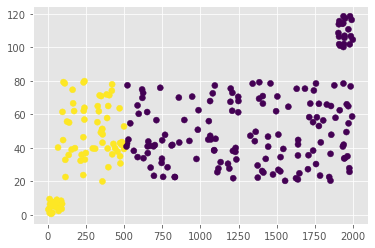

In [110]:
# Generate the random data

x2 = np.random.uniform(20, 80, 200)
x1 = np.random.uniform(0, 2000, 200)
low_outlier_x2 = np.random.uniform(0, 10, 20)
low_outlier_x1 = np.random.uniform(0, 100, 20)
high_outlier_x2 = np.random.uniform(100, 120, 20)
high_outlier_x1 = np.random.uniform(1900, 2000, 20)
x2 = np.r_[x2, low_outlier_x2, high_outlier_x2]
x1 = np.r_[x1, low_outlier_x1, high_outlier_x1]

X = np.c_[x1, x2]
y = [1 if x < 500 else 0 for x in x1]


plt.scatter(x1, x2, c=y)


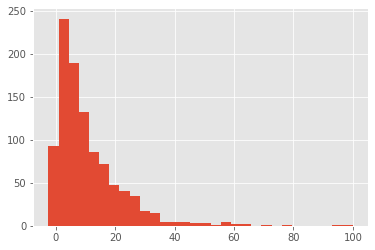

In [93]:
x = np.random.exponential(10, size=1000) + np.random.normal(0, 1, size=1000)
plt.hist(x, 30)
plt.show()


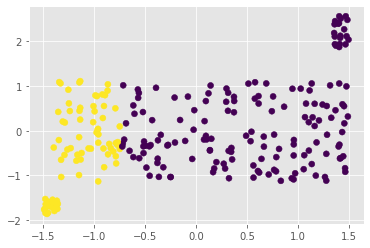

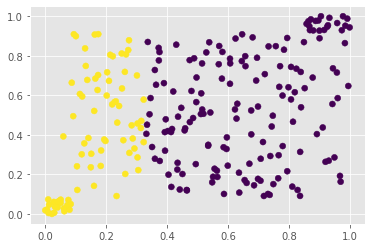

In [116]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.show()

X_quantile = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_quantile[:, 0], X_quantile[:, 1], c=y)
plt.show()


Let's check quantile distribution for each bin.

[12, 12, 7, 13, 11, 9, 7, 8, 3]


(0.0, 13.5)

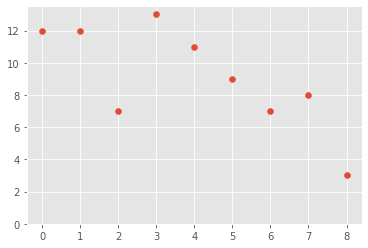

In [182]:
q_transform = QuantileTransformer(n_quantiles=10, output_distribution="normal")
q_transform.fit(X)
X_q = q_transform.transform(X)
references = q_transform.references_
dist = [
    sum([references[i] < x <= references[i + 1] for x in X_q[:, 0]])
    for i in range(len(references) - 1)
]
print(dist)
plt.scatter(range(len(dist)), dist)
plt.ylim(
    0,
)


In [155]:
from sklearn.preprocessing import OneHotEncoder

labels = np.array(
    [
        np.random.choice(["new", "old", "current", "very old", "very new"])
        for _ in range(10)
    ]
).reshape(-1, 1)

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
x = ohe.fit_transform(labels)
x


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

# 3. Metrics

In [186]:
df = pd.read_csv("../data/creditcard.csv")[:80_000]
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [189]:
X = df.drop(columns=["Time", "Amount", "Class"]).values
y = df["Class"].values
df["Class"].value_counts()


0    79804
1      196
Name: Class, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)


In [202]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
model.fit(X_train, y_train)
model.predict(X_train).sum(), y_train.sum()


(136, 157)

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score

grid = GridSearchCV(
    estimator=model,
    param_grid={"class_weight": [{0: 1, 1: v} for v in range(1, 4)]},
    cv=4,
    n_jobs=-1,
)

grid.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=LogisticRegression(class_weight={0: 1, 1: 2},
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [214]:
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.049311,0.190564,0.004667,0.000705,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998563,0.998500,0.998062,0.999000,0.998531,0.000332,3
1,1.757536,0.192914,0.010683,0.008047,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.998687,0.998875,0.998313,0.999125,0.998750,0.000296,2
2,1.168018,0.102147,0.002730,0.000520,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.998875,0.999062,0.998437,0.999250,0.998906,0.000301,1


In [209]:
from sklearn.metrics import precision_score, recall_score

preds = grid.best_estimator_.predict(X_train)
precision_score(y_train, preds), recall_score(y_train, preds)


(0.8111888111888111, 0.7388535031847133)

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score

grid = GridSearchCV(
    estimator=model,
    param_grid={"class_weight": [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
    },
    return_train_score=True,
    refit="precision",
    cv=10,
    n_jobs=-1,
)

grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1, 1: 2},
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0:...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276

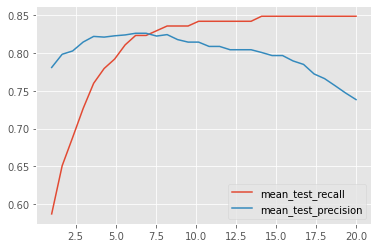

In [230]:
results = pd.DataFrame(grid.cv_results_)
for score in ["mean_test_recall", "mean_test_precision"]:
    plt.plot([_[1] for _ in results["param_class_weight"]], results[score], label=score)
    plt.legend()


Let's define our own scoring function in terms of precision and recall.

In [239]:
def min_precision_recall(est, X, y_true, sample_weight=None):
    preds = est.predict(X)
    recall = recall_score(y_true, preds)
    precision = precision_score(y_true, preds)
    return min(recall, precision)


grid = GridSearchCV(
    estimator=model,
    param_grid={"class_weight": [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "min_both": min_precision_recall,
    },
    return_train_score=True,
    refit="min_both",
    cv=10,
    n_jobs=-1,
)

grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1, 1: 2},
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0:...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484}

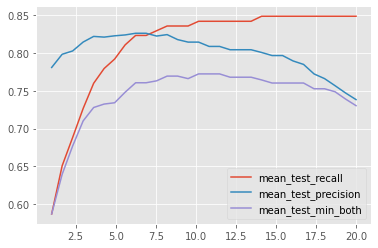

In [236]:
results = pd.DataFrame(grid.cv_results_)
for score in ["mean_test_recall", "mean_test_precision", "mean_test_min_both"]:
    plt.plot([_[1] for _ in results["param_class_weight"]], results[score], label=score)
    plt.legend()


# 4. Meta Estimators

Meta estimators are able to accepts other models as input and combine them. For example a `VotingClassifier` is a meta estimator.

In [241]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


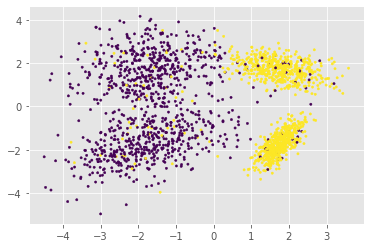

In [252]:
X, y = make_classification(
    n_samples=2000, n_features=2, n_redundant=0, class_sep=1.75, flip_y=0.1, random_state=21
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=5)


1895

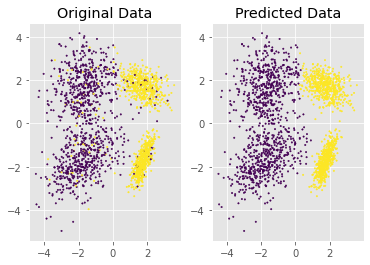

In [274]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = VotingClassifier(
    estimators=[("clf1", clf1), ("clf2", clf2)],
    voting="soft",
    weights=[0.5, 0.5]
)

clf3.fit(X,y)

preds = clf3.predict(X)

fig, axis = plt.subplots(1,2)

axis[0].scatter(X[:,0], X[:,1], c=y, s=2)
axis[0].set_title("Original Data")
axis[1].scatter(X[:,0], X[:,1], c=preds, s=2)
axis[1].set_title("Predicted Data")
len(y) - sum(y ^ preds)


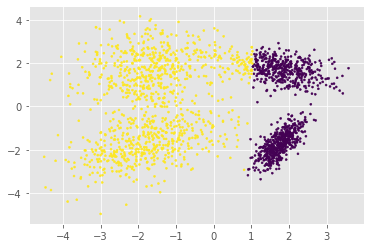

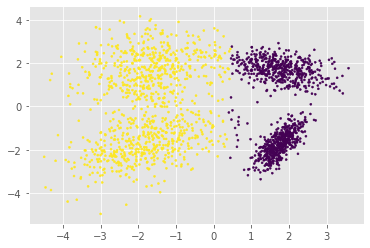

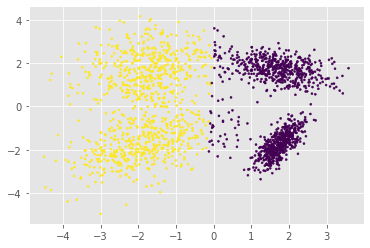

In [302]:
model = LogisticRegression()
model.fit(X,y)

for thr in [0.2, 0.4, 0.6]: 
    probs = model.predict_proba(X)
    probs = (probs[:,0] > thr).astype(int)
    plt.scatter(X[:,0], X[:,1], c=probs, s=4)
    plt.show()

In [300]:
probs = model.predict_proba(X[:5,:])
probs

array([[0.98674522, 0.01325478],
       [0.16531323, 0.83468677],
       [0.87759426, 0.12240574],
       [0.97843645, 0.02156355],
       [0.91656446, 0.08343554]])